<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_188589164_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.01)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 188589164
period = 2.61586471371264  # Orbital period in days
epoch = 1956.40096222579
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.25]
folded_lc = folded_lc[folded_lc.time > -0.25]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_188589164_all_sector_lightcurve.csv


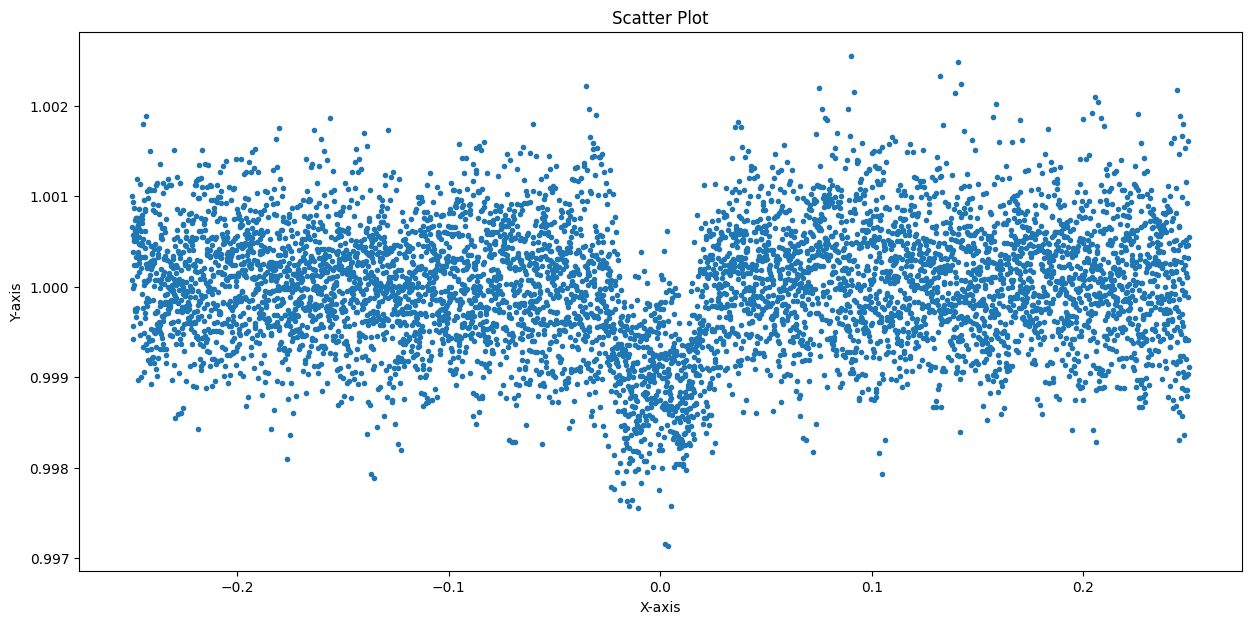

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('TIC_188589164_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [8]:
ID = 188589164
sectors = np.array([24, 25])
target = tr.target(ID=ID, sectors=sectors)

<ipython-input-9-3bea4b3cfae3>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_24, ap_25])


Sector 24


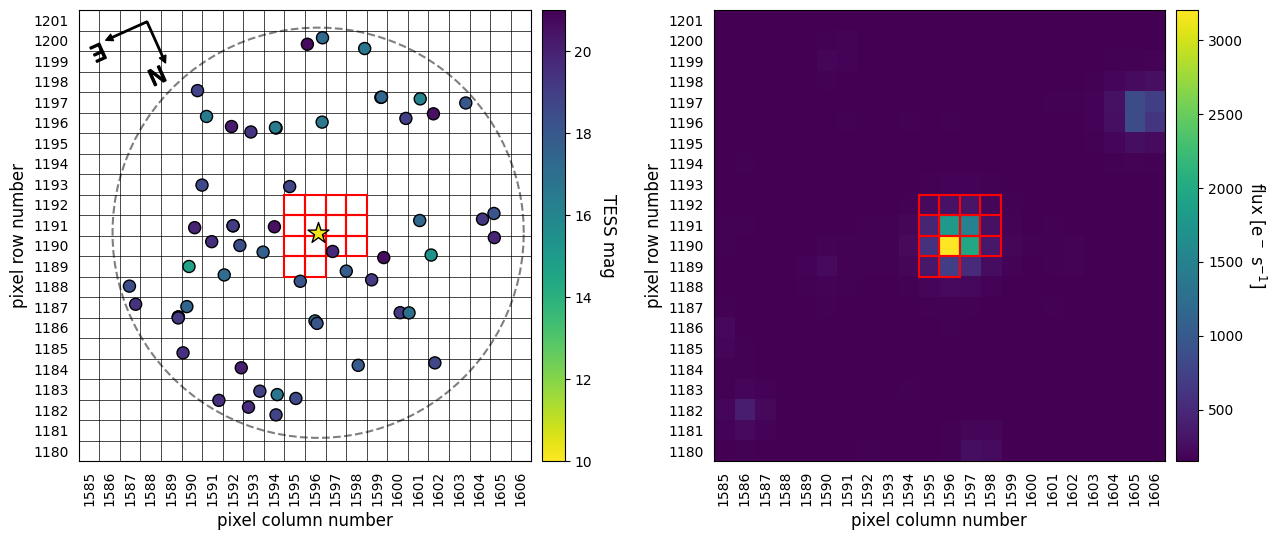

Sector 25


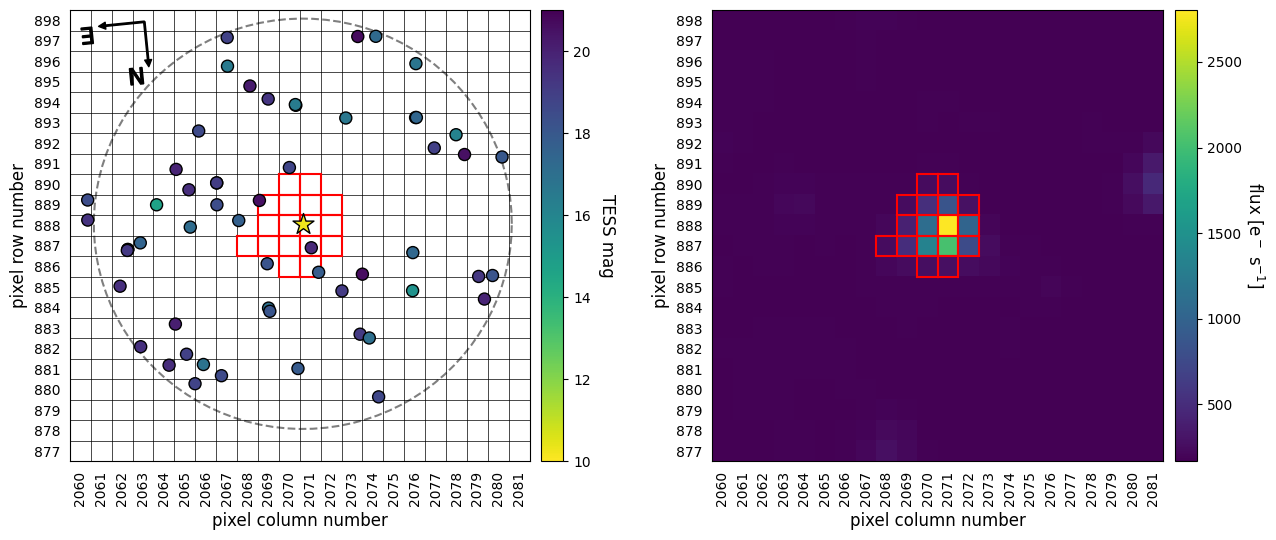

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,188589164,10.2705,8.694,8.100,7.869,239.578325,35.406744,0.306053,0.325635,3352.00,63.224000,0.000,0.000
1,1101673693,19.7691,NaN,NaN,NaN,239.576400,35.413279,NaN,NaN,NaN,0.771109,24.193,346.506
2,1101673678,20.5416,NaN,NaN,NaN,239.591259,35.400034,NaN,NaN,NaN,1.212360,44.990,122.473
3,188589169,17.7823,16.402,15.878,15.867,239.574871,35.419949,0.540000,0.573437,3673.00,0.933537,48.605,347.969
4,188589168,18.1309,17.072,16.376,15.979,239.590811,35.417125,0.670000,0.554681,4256.00,0.486699,52.334,44.426
5,188589157,18.7500,17.193,16.002,16.085,239.580768,35.391487,0.520000,0.474062,3626.00,0.658082,55.390,172.562
6,188589162,17.6615,16.505,15.634,15.768,239.598408,35.405217,0.620000,0.683897,3976.00,0.649646,59.184,95.324
7,1101673695,20.6384,NaN,NaN,NaN,239.561139,35.420903,NaN,NaN,NaN,NaN,71.697,315.316
8,1101673694,19.0796,NaN,NaN,NaN,239.568108,35.425201,NaN,NaN,6166.00,-0.181185,72.893,335.723
9,1101673685,18.4631,NaN,NaN,NaN,239.604790,35.400761,NaN,NaN,3898.00,1.225580,80.589,105.494


In [9]:
ap_24 = np.array([[1595.0, 1189.0], [1595.0, 1190.0], [1595.0, 1191.0], [1595.0, 1192.0],
      [1596.0, 1189.0], [1596.0, 1190.0], [1596.0, 1191.0], [1596.0, 1192.0], [1597.0, 1190.0], [1597.0, 1191.0], [1597.0, 1192.0],
      [1598.0, 1190.0], [1598.0, 1191.0], [1598.0, 1192.0]])
ap_25 = np.array([[2068.0, 887.0],
      [2069.0, 887.0], [2069.0, 888.0], [2069.0, 889.0], [2070.0, 886.0], [2070.0,
        887.0], [2070.0, 888.0], [2070.0, 889.0], [2070.0, 890.0], [2071.0, 886.0],
      [2071.0, 887.0], [2071.0, 888.0], [2071.0, 889.0], [2071.0, 890.0], [2072.0,
        887.0], [2072.0, 888.0], [2072.0, 889.0]])

apertures = np.array([ap_24, ap_25])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [10]:
tdepth = 0.596 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,188589164,10.2705,8.694,8.100,7.869,239.578325,35.406744,0.306053,0.325635,3352.00,63.224000,0.000,0.000,9.990269e-01,0.000597
1,1101673693,19.7691,NaN,NaN,NaN,239.576400,35.413279,NaN,NaN,NaN,0.771109,24.193,346.506,1.300192e-04,0.000000
2,1101673678,20.5416,NaN,NaN,NaN,239.591259,35.400034,NaN,NaN,NaN,1.212360,44.990,122.473,2.550277e-05,0.000000
3,188589169,17.7823,16.402,15.878,15.867,239.574871,35.419949,0.540000,0.573437,3673.00,0.933537,48.605,347.969,2.975625e-04,0.000000
4,188589168,18.1309,17.072,16.376,15.979,239.590811,35.417125,0.670000,0.554681,4256.00,0.486699,52.334,44.426,2.640778e-04,0.000000
5,188589157,18.7500,17.193,16.002,16.085,239.580768,35.391487,0.520000,0.474062,3626.00,0.658082,55.390,172.562,9.208796e-05,0.000000
6,188589162,17.6615,16.505,15.634,15.768,239.598408,35.405217,0.620000,0.683897,3976.00,0.649646,59.184,95.324,1.406736e-04,0.000000
7,1101673695,20.6384,NaN,NaN,NaN,239.561139,35.420903,NaN,NaN,NaN,NaN,71.697,315.316,2.786209e-06,0.000000
8,1101673694,19.0796,NaN,NaN,NaN,239.568108,35.425201,NaN,NaN,6166.00,-0.181185,72.893,335.723,6.834222e-06,0.000000
9,1101673685,18.4631,NaN,NaN,NaN,239.604790,35.400761,NaN,NaN,3898.00,1.225580,80.589,105.494,1.954289e-06,0.000000


In [11]:
%%time

# read in the light curve
lc = pd.read_csv("TIC_188589164_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = 2.61586471371264

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 188589164.
Calculating EB and EBx2P scenario probabilities for 188589164.
Calculating PTP scenario probability for 188589164.
Calculating PEB and PEBx2P scenario probabilities for 188589164.
Calculating STP scenario probability for 188589164.
Calculating SEB and SEBx2P scenario probabilities for 188589164.
Calculating DTP scenario probability for 188589164.
Calculating DEB and DEBx2P scenario probabilities for 188589164.
Calculating BTP scenario probability for 188589164.
Calculating BEB and BEBx2P scenario probabilities for 188589164.
CPU times: user 1min 6s, sys: 1.35 s, total: 1min 7s
Wall time: 54.9 s


In [12]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.04752879
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,188589164,TP,0.306053,0.325635,2.615865,89.051768,0.193337,0.294184,84.420324,1.071044,0.000000,0.000000,7.754371e-01
1,188589164,EB,0.306053,0.325635,2.615865,84.390849,1.912066,0.074601,41.032664,0.000000,0.288900,0.308382,9.036794e-44
2,188589164,EBx2P,0.306053,0.325635,5.231729,88.057281,0.522147,0.735239,181.184198,0.000000,0.303156,0.320548,1.289481e-07
3,188589164,PTP,0.306053,0.325635,2.615865,89.139640,0.201616,0.193649,73.036806,1.158532,0.000000,0.000000,9.452061e-02
4,188589164,PEB,0.306053,0.325635,2.615865,84.000324,1.532006,0.287613,78.882159,0.000000,0.276286,0.297539,1.189525e-43
5,188589164,PEBx2P,0.306053,0.325635,5.231729,87.712745,0.995332,0.454713,174.235119,0.000000,0.295461,0.313992,1.827947e-19
6,188589164,STP,0.268943,0.291190,2.615865,89.195126,0.224038,0.099453,90.261165,1.449845,0.000000,0.000000,4.623398e-02
7,188589164,SEB,0.108589,0.132001,2.615865,86.742299,1.755069,0.149549,5.971874,0.000000,0.040345,0.100000,6.635127e-44
8,188589164,SEBx2P,0.170278,0.202172,5.231729,88.111441,1.052272,0.719374,208.140534,0.000000,0.168335,0.200272,8.269130e-16
9,188589164,DTP,0.306053,0.325635,2.615865,89.758313,0.094621,0.359911,275.276292,1.056513,0.000000,0.000000,8.251349e-02


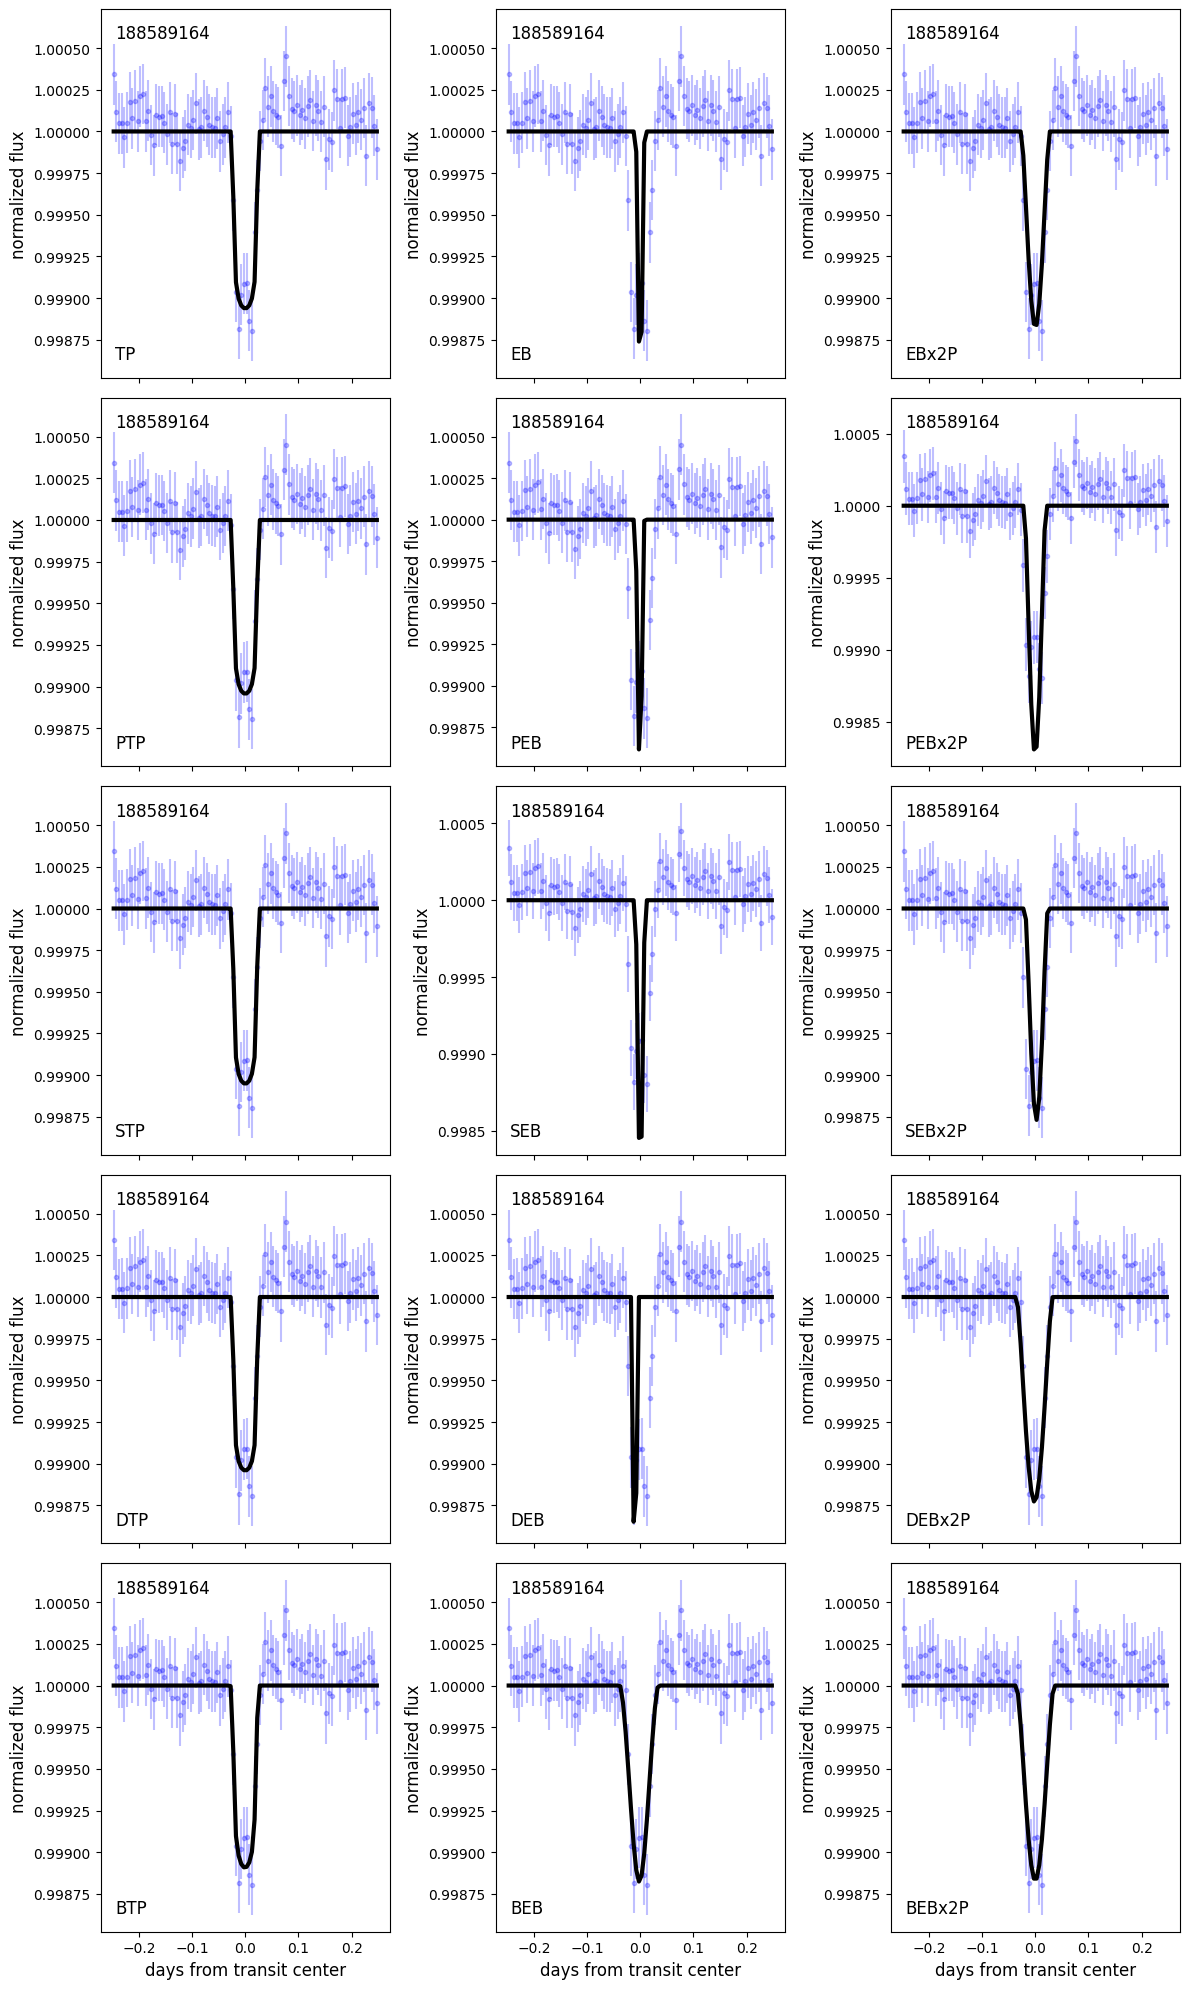

In [13]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [14]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.04555022672604629 +/- 0.0031448925121818024
NFPP = 0.0 +/- 0.0
CPU times: user 17min 47s, sys: 31.6 s, total: 18min 19s
Wall time: 13min 43s


Our final conclusion about this specified planet of TIC 188589164 is that it is most likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).